## Predicting Heart Disease using Machine Learning

This notebook looks into using various Python based Machine Learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Load data

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration(EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you are working with.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [7]:
data["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [8]:
data["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [9]:
data["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [10]:
data["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [11]:
data["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [12]:
data["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [13]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

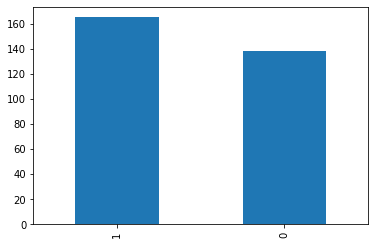

In [14]:
data["target"].value_counts().plot(kind="bar")

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
# comparing target with sex column
pd.crosstab(data['target'],data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


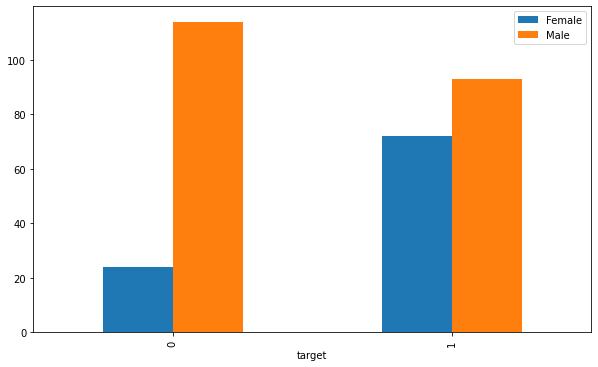

In [17]:
pd.crosstab(data.target,data.sex).plot(kind = "bar",figsize=(10,6))
plt.legend(["Female","Male"])

<AxesSubplot:ylabel='Frequency'>

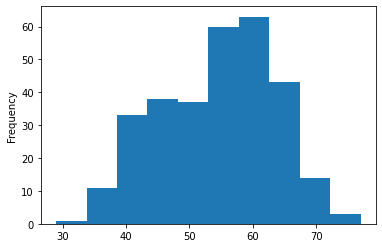

In [18]:
data.age.plot.hist()

In [19]:
# comparing target with cp column
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


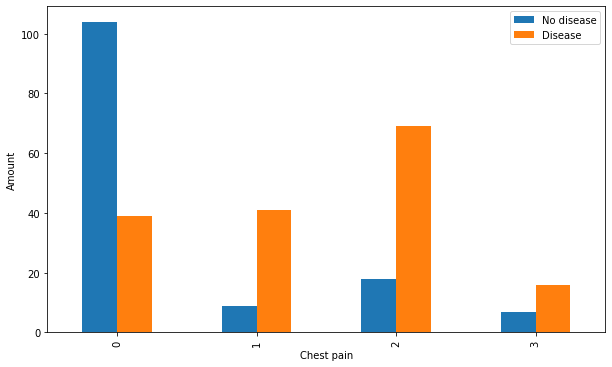

In [20]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(10,6))
plt.xlabel("Chest pain")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])

In [21]:
# Making correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Modelling

In [22]:
# splitting data into x and y 
x=data.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y=data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# splitting data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =5)

In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3


In [26]:
y_train

266    0
215    0
99     1
119    1
11     1
      ..
8      1
73     1
118    1
189    0
206    0
Name: target, Length: 242, dtype: int64

In [27]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2


In [28]:
y_test

302    0
243    0
268    0
213    0
24     1
      ..
25     1
259    0
196    0
149    1
212    0
Name: target, Length: 61, dtype: int64

#####  It's time to build a machine learning model

we are going to try 3 different machine learning models:

1.Logistic Regression

2.KNN

3.random Forest classifier 

In [29]:
# Comparing the models 
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()}
def fit_and_scores(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores   

In [30]:
model_scores= fit_and_scores(models = models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\ravip\Documents\Sample\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.639344262295082,
 'Random Forest': 0.9016393442622951}

In [31]:
# By comparition we got Logistic regression has got accuracy result
model = LogisticRegression()

In [32]:
model.fit(x_train,y_train)

C:\Users\ravip\Documents\Sample\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction 

In [33]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [34]:
# predicting training model
x_train_pred = model.predict(x_train)
x_train_accuracy=accuracy_score(x_train_pred ,y_train)
x_train_accuracy

0.8388429752066116

In [35]:
# predicting testing model
x_test_pred = model.predict(x_test)
x_test_accuracy=accuracy_score(x_test_pred ,y_test)
x_test_accuracy

0.9180327868852459

## Testing a model

In [36]:
#Testing a data  
input_data = (57,1,0,152,274,0,1,88,1,1.2,1,1,3)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction==0):
    print("The person does not have a heart disease")
else:
    print("The person has heart disease")
    

[0]
The person does not have a heart disease


## Importing pickle

In [37]:
import pickle

In [38]:
filename= 'Heart Disease Prediction Model'
pickle.dump(model,open(filename,'wb'))

In [39]:
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)